In [2]:
import pandas as pd
import seaborn as sns
import datetime as dt

c_data = pd.read_csv("jakarta-central (us consulate), indonesia-air-quality.csv", header = 0, names = ["Date", "PM25", "PM10"])
c_data["Loc"] = "Central Jakarta"
s_data = pd.read_csv("jakarta-south (us consulate), indonesia-air-quality.csv", header = 0, names = ["Date", "PM25", "PM10"])
s_data["Loc"] = "South Jakarta"
data = pd.concat([c_data, s_data])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 0 to 2461
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4959 non-null   object
 1   PM25    4959 non-null   object
 2   PM10    4959 non-null   object
 3   Loc     4959 non-null   object
dtypes: object(4)
memory usage: 193.7+ KB


In [3]:
# Calculate the AQI as the maximum values between pm25 and pm10
data["AQI"] = data[["PM25", "PM10"]].max(axis = 1)
data.head()

,Date,PM25,PM10,Loc,AQI
0,2022/10/1,86,,Central Jakarta,86.0
1,2022/10/2,47,,Central Jakarta,47.0
2,2022/10/3,84,,Central Jakarta,84.0
3,2022/10/4,66,,Central Jakarta,66.0
4,2022/10/5,71,,Central Jakarta,71.0


In [4]:
# Drop pm25 and pm10 columns
data.drop(["PM25", "PM10"], axis = 1, inplace = True)
data.head()

,Date,Loc,AQI
0,2022/10/1,Central Jakarta,86.0
1,2022/10/2,Central Jakarta,47.0
2,2022/10/3,Central Jakarta,84.0
3,2022/10/4,Central Jakarta,66.0
4,2022/10/5,Central Jakarta,71.0


In [5]:
# Convert date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Loc,AQI
0,2022-10-01,Central Jakarta,86.0
1,2022-10-02,Central Jakarta,47.0
2,2022-10-03,Central Jakarta,84.0
3,2022-10-04,Central Jakarta,66.0
4,2022-10-05,Central Jakarta,71.0


In [6]:
data.isna().sum()

Date    0
Loc     0
AQI     0
dtype: int64

In [30]:
# Drop data below 2016 (the data is incomplete)
# data_filter = data[data["Date"].dt.year > 2015]
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.strftime("%Y-%m")
data.drop(index = data[data["Year"] < 2016].index, inplace = True)
data

,Date,Loc,AQI,Year,Month
0,2022-10-01,Central Jakarta,86.0,2022,2022-10
1,2022-10-02,Central Jakarta,47.0,2022,2022-10
2,2022-10-03,Central Jakarta,84.0,2022,2022-10
3,2022-10-04,Central Jakarta,66.0,2022,2022-10
4,2022-10-05,Central Jakarta,71.0,2022,2022-10
...,...,...,...,...,...
2388,2017-12-18,South Jakarta,44.0,2017,2017-12
2389,2017-02-14,South Jakarta,21.0,2017,2017-02
2390,2017-02-15,South Jakarta,30.0,2017,2017-02
2391,2017-02-19,South Jakarta,23.0,2017,2017-02


In [32]:
# Group data (monthly)
data_monthly = data.drop(columns = ["Date", "Year"]).groupby(["Month", "Loc"]).agg(["min", "mean", "max"]).reset_index()
data_monthly.columns = [" ".join(column) for column in data_monthly.columns.to_flat_index()]
data_monthly.columns = [column.strip() for column in data_monthly.columns]
data_monthly

,Month,Loc,AQI min,AQI mean,AQI max
0,2016-01,Central Jakarta,43.0,78.586207,121.0
1,2016-01,South Jakarta,50.0,90.655172,138.0
2,2016-02,Central Jakarta,45.0,76.304348,120.0
3,2016-02,South Jakarta,36.0,86.068966,147.0
4,2016-03,Central Jakarta,53.0,93.129032,138.0
...,...,...,...,...,...
159,2022-08,South Jakarta,88.0,110.291667,150.0
160,2022-09,Central Jakarta,53.0,93.200000,131.0
161,2022-09,South Jakarta,68.0,111.800000,149.0
162,2022-10,Central Jakarta,47.0,75.636364,119.0


In [33]:
# Group date (yearly)
data_yearly = data.drop(columns = ["Date", "Month"]).groupby(["Year", "Loc"]).agg(["min", "mean", "max"]).reset_index()
data_yearly.columns = [" ".join(column) for column in data_yearly.columns.to_flat_index()]
data_yearly.columns = [column.strip() for column in data_yearly.columns]
data_yearly

,Year,Loc,AQI min,AQI mean,AQI max
0,2016,Central Jakarta,32.0,99.891061,209.0
1,2016,South Jakarta,33.0,101.972527,165.0
2,2017,Central Jakarta,7.0,79.558282,148.0
3,2017,South Jakarta,7.0,82.298780,165.0
4,2018,Central Jakarta,12.0,73.144509,161.0
5,2018,South Jakarta,4.0,77.495702,209.0
6,2019,Central Jakarta,9.0,77.811798,159.0
7,2019,South Jakarta,23.0,83.713873,165.0
8,2020,Central Jakarta,7.0,62.746479,137.0
9,2020,South Jakarta,6.0,56.741758,140.0


In [39]:
coord_dict = {'lon': [106.83409110000002], 'lat': [-6.1864864]}
pd.DataFrame.from_dict(coord_dict)
#coord = pd.DataFrame.from_dict({'lon': 106.83409110000002, 'lat': -6.1864864})
#coord

,lon,lat
0,106.834091,-6.186486


In [40]:
data_monthly.head().style.format(precision = 2).hide()

Month,Loc,AQI min,AQI mean,AQI max
2016-01,Central Jakarta,43.00,78.59,121.00
2016-01,South Jakarta,50.00,90.66,138.00
2016-02,Central Jakarta,45.00,76.30,120.00
2016-02,South Jakarta,36.00,86.07,147.00
2016-03,Central Jakarta,53.00,93.13,138.00


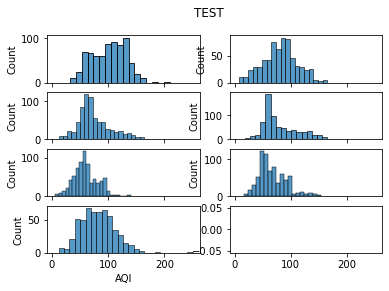

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, sharex=True)
fig.suptitle("TEST")

year_start = 2016
for i in range(4):
    for j in range (2):
        sns.histplot(data_filter[data_filter["Year"] == year_start], x = "AQI", fill = True, ax = axes[i, j])
        year_start += 1

<AxesSubplot:xlabel='Year', ylabel='AQI'>

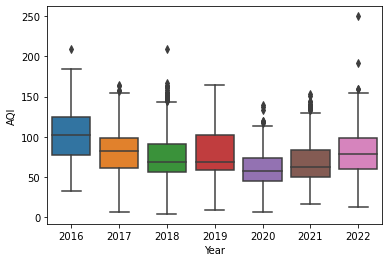

In [42]:
sns.boxplot(data_filter, x = "Year", y = "AQI")

In [47]:
data_yearly[data_yearly["Loc"] == "Central Jakarta"][["Year", "AQI min", "AQI mean", "AQI max"]]

,Year,AQI min,AQI mean,AQI max
0,2016,32.0,99.891061,209.0
2,2017,7.0,79.558282,148.0
4,2018,12.0,73.144509,161.0
6,2019,9.0,77.811798,159.0
8,2020,7.0,62.746479,137.0
10,2021,21.0,66.535714,145.0
12,2022,12.0,74.862319,150.0
